<a href="https://colab.research.google.com/github/Avigail-Spira/CS-381/blob/main/A_Spira_Quiz4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Introduction
The task is to predict if the mortgage application will be accepted or denied using the given data. 

##EDA
The data set is the Federal Reserve Bank of Boston. There are 2,381 observations of 1 response/dependent variable and 12 explanatory/independent variables.
- dir- debt payments to total income ratio
- hir- housing expenses to income ratio
- lvr- ratio of size of loan to assessed value of property
- ccs- consumer credit score from 1 to 6 (a low value being a good score)
- mcs- mortgage credit score from 1 to 4 (a low value being a good score)
- pbcr- public bad credit record ?
- dmi- denied mortgage insurance ?
- self- self employed ?
- single- is the applicant single ?
- uria- 1989 Massachusetts unemployment rate in the applicant's industry
- condominium- is unit a condominium ? (was called comdominiom in version 0.2-9 and earlier versions of the package)
- black- is the applicant black? (yes or no)
- deny- mortgage application denied? (yes or no)

In [ ]:
# load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Data initialization
df = pd.read_csv('https://raw.githubusercontent.com/Avigail-Spira/CS-381/main/quiz4.csv')
df.head() #print sample of the data

,Unnamed: 0,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
0,1,0.221,0.221,0.800000,5.0,2.0,no,no,no,no,3.9,0,no,no
1,2,0.265,0.265,0.921875,2.0,2.0,no,no,no,yes,3.2,0,no,no
2,3,0.372,0.248,0.920398,1.0,2.0,no,no,no,no,3.2,0,no,no
3,4,0.320,0.250,0.860465,1.0,2.0,no,no,no,no,4.3,0,no,no
4,5,0.360,0.350,0.600000,1.0,1.0,no,no,no,no,3.2,0,no,no


In [4]:
#check for nulls
df.isnull().sum()

Unnamed: 0     0
dir            0
hir            0
lvr            0
ccs            0
mcs            0
pbcr           1
dmi            0
self           1
single         0
uria           0
comdominiom    0
black          0
deny           0
dtype: int64

There are just 2 null values in the entire data set which is minimal but they need to be dealt with. 

In [5]:
print(f"Ther min value of ccs is {df['ccs'].min()} and the max value is {df['ccs'].max()}")
print(f"Ther min value of mcs is {df['mcs'].min()} and the max value is {df['mcs'].max()}")



Ther min value of ccs is 1.0 and the max value is 6.0
Ther min value of mcs is 1.0 and the max value is 4.0


The values of ccs and mcs are within normal range

In [6]:
df.describe()

,Unnamed: 0,dir,hir,lvr,ccs,mcs,uria,comdominiom
count,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000
mean,1191.000000,0.330814,0.255346,0.737760,2.116387,1.721008,3.774496,0.288114
std,687.479818,0.107235,0.096635,0.178715,1.666370,0.537169,2.026636,0.452980
min,1.000000,0.000000,0.000000,0.020000,1.000000,1.000000,1.800000,0.000000
25%,596.000000,0.280000,0.214000,0.652850,1.000000,1.000000,3.100000,0.000000
50%,1191.000000,0.330000,0.260000,0.779412,1.000000,2.000000,3.200000,0.000000
75%,1786.000000,0.370000,0.298800,0.868421,2.000000,2.000000,3.900000,1.000000
max,2381.000000,3.000000,3.000000,1.950000,6.000000,4.000000,10.600000,1.000000


The mean of dir and hir is much closer to the minimum value than the maximum value so it seems like there are outliers with higher values. Most of the attributes' median are similar to the mean which is a basically normal distribution. However, by css the median is significantly lower than the mean so the distribution must be skewed to the right. 

In [7]:
print(df['self'].value_counts())  #prints count for self employed or not
print(df['single'].value_counts())  #prints count of single applicants
print(df['black'].value_counts())  #prints count of black applicants
print(df['comdominiom'].value_counts())  #prints count of condominiom apartments


no     2103
yes     277
Name: self, dtype: int64
no     1444
yes     937
Name: single, dtype: int64
no     2042
yes     339
Name: black, dtype: int64
0    1695
1     686
Name: comdominiom, dtype: int64


* A fraction of the people in the data set are self employed. Most are not. 
* A large portion of the applicants are single, almost 40% are.
* About 15% of applicants are black. 
* And majority of the units are not condominioms but there is a large chunk of the data that is. 

Text(0.5, 1.0, 'Mortgage Credit Score Bar Chart')

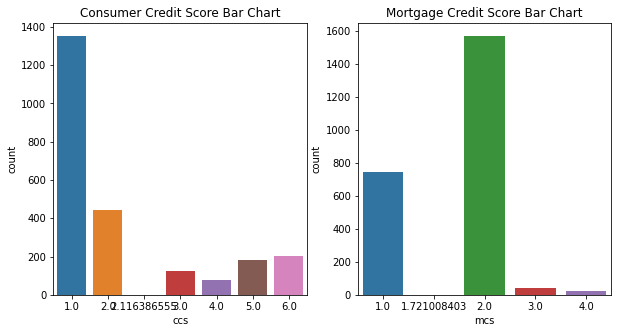

In [8]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.countplot(x='ccs',data=df)
plt.title('Consumer Credit Score Bar Chart')
plt.subplot(122)
sns.countplot(x='mcs',data=df)
plt.title('Mortgage Credit Score Bar Chart')

The biggest distribution of credit score in this data is 1 which is the lowest. The next highest is 2, the second to lowest. So the majority of applicants under study have the lowest possible credit scores. Their mortgage credit scores' distribution is different. Majority have a mortgage credit score of 2 which is the middle possible value. And the next highest distribution is 1, the lowest. This is not as we would expect because the mortgage credit scoring is usually done on a stricter scale than the consumer credit score. So I would have expected the scores to be lower not higher.

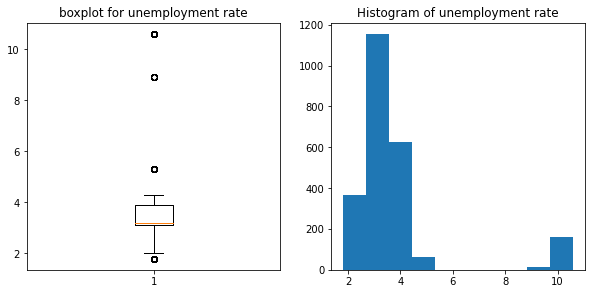

In [9]:
unemployment_rate = df['uria']

plt.figure(figsize=(10,10))

# boxplot for unemployment rate
plt.subplot(221)
plt.boxplot(x=unemployment_rate)
plt.title('boxplot for unemployment rate')


plt.subplot(222)
#histogram
plt.hist(tuple(unemployment_rate))
plt.title('Histogram of unemployment rate')

plt.show()

- Boxplot: The boxplot shows that the median for unemployment rate is approximately between 3 and 4. It also gives us an idea that there  outliers  upper ends of its tail.

- Histogram: The histogram shows how most of the unemployment rate values are around 2-5 and that there are extreme values and outliers by the 9 and 10 values which are skewing the data. 

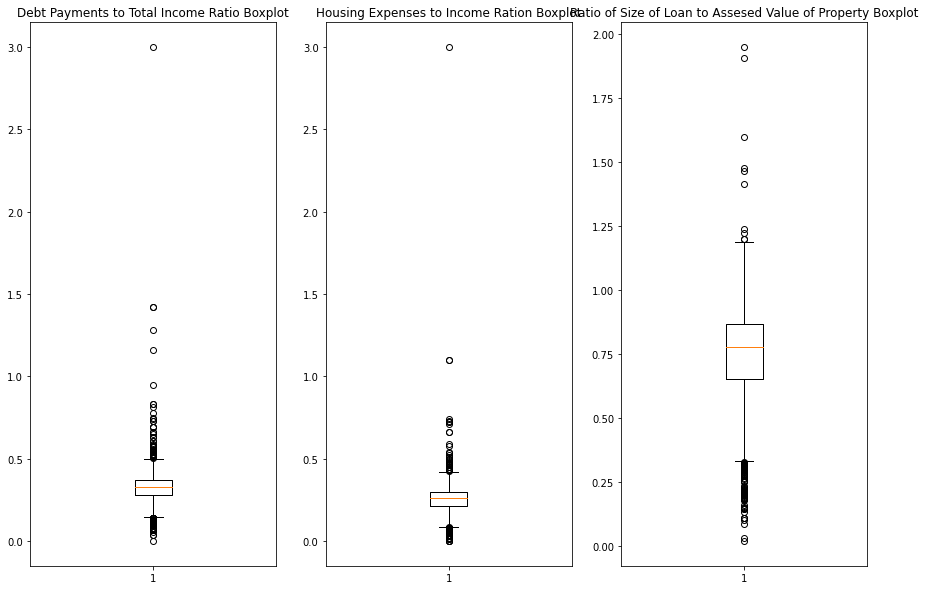

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(131)
plt.boxplot(x=df['dir'])
plt.title('Debt Payments to Total Income Ratio Boxplot')

plt.subplot(132)
plt.boxplot(df['hir'])
plt.title('Housing Expenses to Income Ration Boxplot')

plt.subplot(133)
plt.boxplot(df['lvr'])
plt.title('Ratio of Size of Loan to Assesed Value of Property Boxplot')

plt.show()

DIR and HIR have similar means and standard deviation. This makes sense because they both are compared to income ratio. They also both have similar distribution of their outliers. 

Text(0.5, 1.0, 'Public Bad Credit Record')

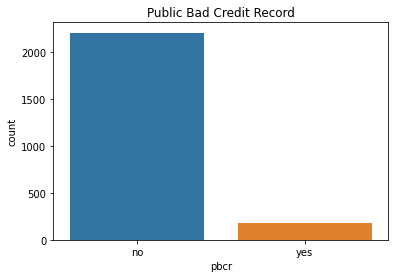

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x='pbcr',data=df)
plt.title('Public Bad Credit Record')

Most applicants do not have a public bad credit record. 

In [ ]:
df.corr()

,Unnamed: 0,dir,hir,lvr,ccs,mcs,uria,comdominiom
Unnamed: 0,1.000000,0.017261,-0.009741,0.089842,0.040050,-0.011960,-0.032517,0.085297
dir,0.017261,1.000000,0.781473,0.150653,0.065234,0.051318,0.046450,-0.012451
hir,-0.009741,0.781473,1.000000,0.126273,0.005277,0.104721,0.036992,-0.046039
lvr,0.089842,0.150653,0.126273,1.000000,0.111939,0.186326,-0.034643,0.055001
ccs,0.040050,0.065234,0.005277,0.111939,1.000000,0.152686,-0.006424,0.050742
mcs,-0.011960,0.051318,0.104721,0.186326,0.152686,1.000000,0.037077,0.090462
uria,-0.032517,0.046450,0.036992,-0.034643,-0.006424,0.037077,1.000000,-0.100647
comdominiom,0.085297,-0.012451,-0.046039,0.055001,0.050742,0.090462,-0.100647,1.000000


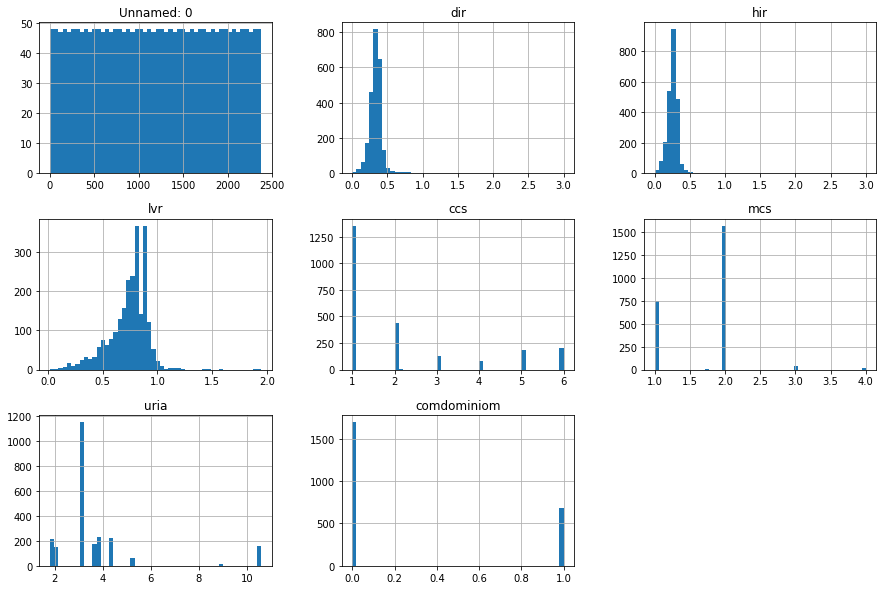

In [ ]:
df.hist(bins=50, figsize=(15,10))
plt.show()

##Data Prep

In [34]:
#Since there are so few null values I am going to drop the columns where there is a null value 
#create new dataframe with the rows with null values dropped
df = df.dropna(axis=1)
df.isnull().sum()

Unnamed: 0     0
dir            0
hir            0
lvr            0
ccs            0
mcs            0
dmi            0
single         0
uria           0
comdominiom    0
black          0
deny           0
dtype: int64

In [11]:
#update column names to more meaningful names
df1 = df.rename(columns={'dir':'debt_to_income', 'hir':"housing_to_income", 'lvr':'loan_to_property_value', 'uria':'unemployment_rate'})
df1.head()

,Unnamed: 0,debt_to_income,housing_to_income,loan_to_property_value,ccs,mcs,pbcr,dmi,self,single,unemployment_rate,comdominiom,black,deny
0,1,0.221,0.221,0.800000,5.0,2.0,no,no,no,no,3.9,0,no,no
1,2,0.265,0.265,0.921875,2.0,2.0,no,no,no,yes,3.2,0,no,no
2,3,0.372,0.248,0.920398,1.0,2.0,no,no,no,no,3.2,0,no,no
3,4,0.320,0.250,0.860465,1.0,2.0,no,no,no,no,4.3,0,no,no
4,5,0.360,0.350,0.600000,1.0,1.0,no,no,no,no,3.2,0,no,no


In [45]:
#The first column can be dropped because it does not add any meaning
del df['Unnamed: 0']
df.head()

,dir,hir,lvr,ccs,mcs,dmi,single,uria,comdominiom,black,deny
0,0.221,0.221,0.800000,5.0,2.0,0,0,3.9,0,0,0
1,0.265,0.265,0.921875,2.0,2.0,0,1,3.2,0,0,0
2,0.372,0.248,0.920398,1.0,2.0,0,0,3.2,0,0,0
3,0.320,0.250,0.860465,1.0,2.0,0,0,4.3,0,0,0
4,0.360,0.350,0.600000,1.0,1.0,0,0,3.2,0,0,0


In [13]:
#make subset of the attributes that have yes/no values
subset = df[['dmi', 'pbcr','single', 'self', 'black', 'deny']]
subset.head()

,dmi,pbcr,single,self,black,deny
0,no,no,no,no,no,no
1,no,no,yes,no,no,no
2,no,no,no,no,no,no
3,no,no,no,no,no,no
4,no,no,no,no,no,no


In [14]:
df1.head()

,debt_to_income,housing_to_income,loan_to_property_value,ccs,mcs,pbcr,dmi,self,single,unemployment_rate,comdominiom,black,deny
0,0.221,0.221,0.800000,5.0,2.0,no,no,no,no,3.9,0,no,no
1,0.265,0.265,0.921875,2.0,2.0,no,no,no,yes,3.2,0,no,no
2,0.372,0.248,0.920398,1.0,2.0,no,no,no,no,3.2,0,no,no
3,0.320,0.250,0.860465,1.0,2.0,no,no,no,no,4.3,0,no,no
4,0.360,0.350,0.600000,1.0,1.0,no,no,no,no,3.2,0,no,no


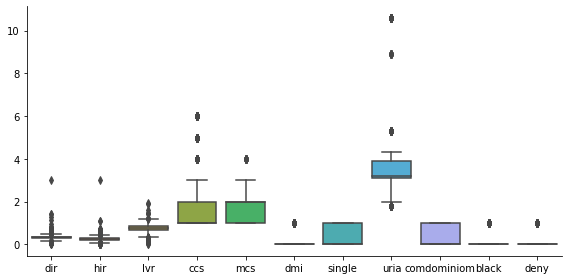

In [46]:
sns.catplot(data=df , kind='box' , height=4, aspect=2)


Before we dropped the first column this graph was meaningless because the first column messed up the graphs of all the others because it was on a completely different scale. Now all the features are in the same realm and the graph looks more normal. dir and hir are visibly similar, ccs and mcs are also. 

In [15]:
#outliers of dir
outliers = df[np.abs(df['dir'] - df['dir'].mean() ) > (2.5 * df['dir'].std() )]
outliers.count()

Unnamed: 0     28
dir            28
hir            28
lvr            28
ccs            28
mcs            28
pbcr           28
dmi            28
self           28
single         28
uria           28
comdominiom    28
black          28
deny           28
dtype: int64

There are 28 outliers when it comes to the dir attribute. These outliers could be normal and left because there could be people with varying debts and with varying incomes. 

In [16]:
#outliers of uria
outliers = df[np.abs(df['uria'] - df['uria'].mean() ) > (2.5 * df['uria'].std() )]
outliers.count()

Unnamed: 0     175
dir            175
hir            175
lvr            175
ccs            175
mcs            175
pbcr           175
dmi            175
self           175
single         175
uria           175
comdominiom    175
black          175
deny           175
dtype: int64

There are many more outliers with uria which can also be expected because that is different for whichever industry the applicant is working in. 

In [17]:
df['dmi'] = df['dmi'].map({'yes':1 ,'no':0})
df['pbcr'] = df['pbcr'].map({'yes':1 ,'no':0})
df['single'] = df['single'].map({'yes':1 ,'no':0})
df['self'] = df['self'].map({'yes':1 ,'no':0})
df['black'] = df['black'].map({'yes':1 ,'no':0})
df['deny'] = df['deny'].map({'yes':1 ,'no':0})

df.head()

,Unnamed: 0,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
0,1,0.221,0.221,0.800000,5.0,2.0,0.0,0,0.0,0,3.9,0,0,0
1,2,0.265,0.265,0.921875,2.0,2.0,0.0,0,0.0,1,3.2,0,0,0
2,3,0.372,0.248,0.920398,1.0,2.0,0.0,0,0.0,0,3.2,0,0,0
3,4,0.320,0.250,0.860465,1.0,2.0,0.0,0,0.0,0,4.3,0,0,0
4,5,0.360,0.350,0.600000,1.0,1.0,0.0,0,0.0,0,3.2,0,0,0


##Prepped Data Review

At this point the columns have been updated to have more meaningful names, uneccesary columns have been dropped, null values have been accounted for, and categorical data has been altered to be used in a more meaningful way. 

##Regression Modeling

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import RFE

In [24]:
status = df[df['black'] == 1]
print(status)
denied = sum(status['deny']==1)
print(f'There are {denied} applicants who are black and whose application has been denied out of {len(status)}')


      Unnamed: 0    dir   hir       lvr  ccs  mcs  pbcr  dmi  self  single  \
29            30  0.260  0.21  0.891089  1.0  2.0   0.0    0   0.0       1   
37            38  0.350  0.22  0.897810  2.0  1.0   0.0    0   0.0       0   
47            48  0.370  0.27  0.853846  1.0  2.0   0.0    0   0.0       1   
65            66  0.285  0.26  0.650000  1.0  2.0   0.0    0   1.0       0   
82            83  0.310  0.31  0.882353  4.0  2.0   0.0    0   0.0       0   
...          ...    ...   ...       ...  ...  ...   ...  ...   ...     ...   
2356        2357  0.330  0.28  0.800000  6.0  2.0   0.0    0   0.0       0   
2364        2365  0.360  0.28  0.715686  2.0  1.0   0.0    0   0.0       0   
2371        2372  0.310  0.28  0.865854  6.0  2.0   0.0    0   0.0       1   
2373        2374  0.350  0.22  0.893939  3.0  2.0   0.0    0   0.0       1   
2378        2379  0.320  0.26  0.753846  6.0  1.0   1.0    0   0.0       1   

      uria  comdominiom  black  deny  
29     1.8            0 

These are the 5 features that had the greatest impact on if the application would be denied or not and those are the scores of each of them. That data regression against all of them using f distribution basically found whichever was best without the need of P values. 

In [53]:
pearson_corr = df.corr(method='pearson')
pearson_corr

,dir,hir,lvr,ccs,mcs,dmi,single,uria,comdominiom,black,deny
dir,1.000000,0.781473,0.150653,0.065234,0.051318,0.044257,0.031035,0.046450,-0.012451,0.076675,0.199337
hir,0.781473,1.000000,0.126273,0.005277,0.104721,0.020147,0.059809,0.036992,-0.046039,0.046053,0.133072
lvr,0.150653,0.126273,1.000000,0.111939,0.186326,0.120989,0.045129,-0.034643,0.055001,0.162104,0.162249
ccs,0.065234,0.005277,0.111939,1.000000,0.152686,0.050964,0.013965,-0.006424,0.050742,0.221150,0.262361
mcs,0.051318,0.104721,0.186326,0.152686,1.000000,0.046692,0.166697,0.037077,0.090462,0.119906,0.109646
dmi,0.044257,0.020147,0.120989,0.050964,0.046692,1.000000,0.019026,0.013014,-0.005473,0.086936,0.352165
single,0.031035,0.059809,0.045129,0.013965,0.166697,0.019026,1.000000,-0.046387,0.298099,0.102328,0.076389
uria,0.046450,0.036992,-0.034643,-0.006424,0.037077,0.013014,-0.046387,1.000000,-0.100647,-0.066231,0.043593
comdominiom,-0.012451,-0.046039,0.055001,0.050742,0.090462,-0.005473,0.298099,-0.100647,1.000000,0.183993,0.039675
black,0.076675,0.046053,0.162104,0.221150,0.119906,0.086936,0.102328,-0.066231,0.183993,1.000000,0.205211


Very high correlation between hir and dir

In [55]:
#linear regression for denied applications
data = np.array(df)
n = len(data)

model = LinearRegression().fit(np.arange(n).reshape((n,1)), data)

print(model.predict([[10]]))

[[0.32763657 0.25696186 0.71020131 2.00183583 1.73203574 0.03500118
  0.40107461 3.88760685 0.22179603 0.14110049 0.10985987]]


In [37]:
#univariate
target = df['deny']
features = df.drop('deny', axis=1).copy()
feature_names = list(features.columns)

selection_kBest = SelectKBest(f_regression, k=5).fit(features, target)

#find which columns were chosed
features_kbest = selection_kBest.get_support()
print('Chosen Features: ', features.columns[features_kbest], '\n')

selection_kBest.scores_


Chosen Features:  Index(['dir', 'lvr', 'ccs', 'dmi', 'black'], dtype='object') 



array([  0.74161184,  98.44180896,  42.88743288,  64.31953539,
       175.85967302,  28.94913233, 336.81573745,  13.96378611,
         4.52958742,   3.75069692, 104.58732528])

In [57]:
#recursive feature elimination
lr = LinearRegression()
rfe = RFE(estimator=lr, n_features_to_select=5, step=1)
rfe.fit(features, target)
rfe_features = features.columns[rfe.support_]
print(rfe_features)

Index(['dir', 'hir', 'lvr', 'dmi', 'black'], dtype='object')


Notice that these are not exactly the same five features that we got previously but it is very similar so we see we are on track. 

In [59]:
rfe_output = pd.DataFrame({'Features': features.columns, 'Rank': rfe.ranking_}).sort_values(by='Rank')
print(rfe_output)

       Features  Rank
1           dir     1
2           hir     1
3           lvr     1
6           dmi     1
10        black     1
4           ccs     2
7        single     3
5           mcs     4
8          uria     5
9   comdominiom     6
0    Unnamed: 0     7


In [85]:
#Lasso Regression
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0).fit(features, target)
lasso_info = pd.DataFrame({'Features': features.columns, 'LassoCoef': lasso.coef_}).sort_values(by='LassoCoef', ascending=False)
print(lasso_info)

      Features  LassoCoef
5          dmi   0.729695
0          dir   0.525845
2          lvr   0.102454
9        black   0.100032
3          ccs   0.039132
6       single   0.032695
4          mcs   0.015397
7         uria   0.007029
8  comdominiom  -0.002478
1          hir  -0.099283


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.606e+01, tolerance: 2.509e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg,

The ones with the highest lasso value are similar to the same features we keep seeing that have the greatest influence on if the application will be denied or not. 

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

def score(name, X, y) :
  X_train,X_test,y_train,y_test = train_test_split(X,y,size=.2)
  le = LinearRegression(normalize=True).fit(X_train,y_train)
  print(name)
  print('Training score: \t', le.score(X_train,y_train))

  y_pred = le.predict(X_test)
  print('r2_score:\t', r2_score(y_test, y_pred))

In [92]:
#chi square
X = df.drop('deny', 1)
y = df['deny']

from sklearn.preprocessing import LabelEncoder
X = X.apply(LabelEncoder().fit_transform)

print(X.head())

   dir  hir   lvr  ccs  mcs  dmi  single  uria  comdominiom  black
0   65  152  1005    5    2    0       0     6            0      0
1  116  253  1413    1    2    0       1     3            0      0
2  367  206  1408    0    2    0       0     3            0      0
3  235  209  1139    0    2    0       0     7            0      0
4  344  441   351    0    0    0       0     3            0      0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [96]:
#chi square analysis
from sklearn.feature_selection import chi2

test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X,y)

feature_score = pd.DataFrame()

for i in range(X.shape[1]):
  new = pd.DataFrame({'Features':X.columns[i], 'Scores':fit.scores_[i]}, index=[i])
  feature_score = pd.concat([feature_score, new])

feature_score

,Features,Scores
0,dir,4505.198538
1,hir,1406.834691
2,lvr,17271.789559
3,ccs,509.976272
4,mcs,19.054759
5,dmi,289.338892
6,single,8.426248
7,uria,12.039515
8,comdominiom,2.668106
9,black,85.991467


These are the feature's scores. They are all high but some have bigger effect like lvr.

In summary, the attributes which influence whether or not the application will be accepted or denied are dir, hir, lvr, dmi, and black. With these attribute being higher or present it is more likely that the application will be denied. With this information we can create a model which takes in data and predicts if the application of that person will be denied or accepted. 